In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pprint
from tensorflow.keras.utils import to_categorical
from scipy.spatial.distance import cdist
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pickle
import matplotlib.pyplot as plt

In [ ]:
#AutoEncoder 

In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from keras import layers
import keras
import datetime, os
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train = pd.read_pickle('/content/drive/MyDrive/MSD/song_artist_terms_OHE.pkl')

In [ ]:
x_train

,song_id,,"b""death 'n","b""drill'n'bass""","b""drill'n'bass"" b'dhr'","b""drill'n'bass"" b'indietronica","b""drill'n'bass"" b'monotone","b""drill'n'bass"" b'net labels music","b""drill'n'bass"" b'progressive metalcore","b""drill'n'bass"" b'sample",...,b'zurich',b'zxzw,b'zxzw 2008,b'zxzw 2008',b'zydeco,b'zydeco',"roll""","roll"" b'progressive rock","roll"" b'third wave ska revival","roll"" b'yeah"
0,b'SOCRUBZ12A58A7A6C3',0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,b'SOCHAXM12AB01876F8',0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,b'SOYLFWQ12A8C13DFF4',0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,b'SOVXNQF12A8C13075E',0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,b'SOTICDK12A8C13A367',0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,b'SOEWCSS12A8C13AFFF',0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10001,b'SOMCIPW12A8C144CA3',0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10002,b'SOMONOL12AB01804C6',0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10003,b'SOEJQOM12A8C13D882',0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train = x_train[x_train.columns[2:]]

In [ ]:
x_train.columns

Index(['b"death 'n', 'b"drill'n'bass"', 'b"drill'n'bass" b'dhr'',
       'b"drill'n'bass" b'indietronica', 'b"drill'n'bass" b'monotone',
       'b"drill'n'bass" b'net labels music',
       'b"drill'n'bass" b'progressive metalcore', 'b"drill'n'bass" b'sample',
       'b"rock 'n roll" b'00s', 'b"rock 'n roll" b'60s',
       ...
       'b'zurich'', 'b'zxzw', 'b'zxzw 2008', 'b'zxzw 2008'', 'b'zydeco',
       'b'zydeco'', 'roll"', 'roll" b'progressive rock',
       'roll" b'third wave ska revival', 'roll" b'yeah'],
      dtype='object', length=6730)

In [ ]:
x_train = x_train.to_numpy(dtype = np.float32)
x_train.shape

(10005, 6730)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
weights = np.load('/content/drive/MyDrive/MSD/cos_weights.npy')

In [ ]:
x_train = np.multiply(x_train, weights.T)

In [ ]:
x_train.shape

(10000, 1000)

In [ ]:
x_train_set = x_train[:9000,:]
x_test_set = x_train[9000:,:]

In [ ]:
x_train_set.shape

(9000, 6730)

In [ ]:
x_test_set.shape

(1005, 6730)

In [ ]:
#Autoencoder architecture 

model = Sequential()

input_shape = keras.Input(shape=(6730, ))

#Encoder
#e = layers.Dense(1024, activation='relu')(input_shape)

e = layers.Dense(786, activation='relu')(input_shape)

e = layers.Dense(512, activation='relu')(e)
#e = layers.Dropout(0.5)
e = layers.Dense(256, activation='relu')(e)
e = layers.Dropout(0.5)(e)
e = layers.Dense(128, activation='relu')(e)
e = layers.Dropout(0.5)(e)
e = layers.Dense(64, activation='relu')(e)
e = layers.Dropout(0.5)(e)
e = layers.Dense(32, activation='relu', name = 'encoded')(e)
#e = layers.MaxPooling2D((2, 2), padding='same', name = 'encoded')(e)


d = layers.Dense(64, activation='relu')(e)
d = layers.Dropout(0.5)(d)
#d = layers.UpSampling2D((2, 2))(d)
d = layers.Dense(128, activation='relu')(d)
d = layers.Dropout(0.5)(d)
#d = layers.UpSampling2D((2, 2))(d)
d = layers.Dense(256, activation='relu')(d)
d = layers.Dropout(0.5)(d)
#d = layers.UpSampling2D((2, 2))(d)
d = layers.Dense(512, activation='relu')(d)
d = layers.Dropout(0.5)(d)
d = layers.Dense(786, activation='relu')(d)
d = layers.Dense(6730, activation='relu')(d)




autoencoder = keras.Model(input_shape, d)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
print(autoencoder.summary())

#Extracting latent variables
layer_name = 'encoded'
intermediate_layer_model = keras.Model(inputs = autoencoder.input, outputs=autoencoder.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(x_train)



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6730)]            0         
                                                                 
 dense_22 (Dense)            (None, 786)               5290566   
                                                                 
 dense_23 (Dense)            (None, 512)               402944    
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0   

In [ ]:
autoencoder.fit(x_train_set, x_train_set,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_set, x_test_set))

Epoch 1/50
141/141 [==============================] - 2s 8ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 2/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 3/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 4/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 5/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 6/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 7/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 8/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 9/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 10/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0034 - val_loss: 0.0037

In [ ]:
print(type(intermediate_output))
print(len(intermediate_output))
print(intermediate_output[1].shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
10005
(32,)


In [ ]:
autoencoder.save('/content/autoencoder_3_final/history')

INFO:tensorflow:Assets written to: /content/autoencoder_3_final/history/assets


In [ ]:
embeddings = intermediate_output.numpy()

In [ ]:
embeddings.shape

(10005, 32)

In [ ]:
embeddings_pd = pd.DataFrame(embeddings)

In [ ]:
embeddings_pd['song_id'] = x_train['song_id']

In [ ]:
embeddings_pd.to_pickle('/content/drive/MyDrive/MSD/artist_terms_embeddings_matrix.pkl')

In [ ]:
embeddings_pd

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,song_id
0,0.071865,0.146462,0.099309,0.0,0.0,0.0,0.0,0.0,0.0,0.017510,...,0.062182,0.157464,0.039663,0.166099,0.0,0.136595,0.157604,0.0,0.258377,b'SOCRUBZ12A58A7A6C3'
1,0.000000,0.000000,0.056479,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.002915,0.100579,0.022586,0.0,0.187963,0.221871,0.0,0.273653,b'SOCHAXM12AB01876F8'
2,0.000000,0.120326,0.083073,0.0,0.0,0.0,0.0,0.0,0.0,0.028034,...,0.000000,0.090546,0.011633,0.309717,0.0,0.237197,0.211936,0.0,0.268567,b'SOYLFWQ12A8C13DFF4'
3,0.004771,0.000000,0.135602,0.0,0.0,0.0,0.0,0.0,0.0,0.053340,...,0.000000,0.175342,0.108057,0.185343,0.0,0.209194,0.247692,0.0,0.213322,b'SOVXNQF12A8C13075E'
4,0.000000,0.089966,0.042336,0.0,0.0,0.0,0.0,0.0,0.0,0.107978,...,0.000000,0.109960,0.141078,0.187198,0.0,0.282225,0.159585,0.0,0.284263,b'SOTICDK12A8C13A367'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.018078,0.000303,0.087436,0.0,0.0,0.0,0.0,0.0,0.0,0.063134,...,0.000000,0.152046,0.054177,0.186511,0.0,0.135987,0.190105,0.0,0.272392,b'SOEWCSS12A8C13AFFF'
9996,0.023799,0.000000,0.154472,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.030065,0.046729,0.185681,0.0,0.232341,0.165357,0.0,0.228144,b'SOMCIPW12A8C144CA3'
9997,0.021132,0.000000,0.132676,0.0,0.0,0.0,0.0,0.0,0.0,0.044222,...,0.000000,0.144242,0.000000,0.091493,0.0,0.179120,0.175604,0.0,0.263317,b'SOMONOL12AB01804C6'
9998,0.022062,0.017326,0.058560,0.0,0.0,0.0,0.0,0.0,0.0,0.031393,...,0.000000,0.000000,0.156604,0.176791,0.0,0.117625,0.203728,0.0,0.172650,b'SOEJQOM12A8C13D882'


In [ ]:
x_train.columns

Index(['song_id', '325e8fcea8e1f6c8595edb169a245b12c2f5fd2b',
       'e79f691b7dbc53af49239a2d0c5edb75dbe9ac02',
       '61b7c3a7aba60e32ef0fc28184ac0ff5ceed0d82',
       'ad15ded1bdeb0ff955e73d0e3788baaa07b8d431',
       '6a719cb0becb1836ede0eb040f38496657c405a2',
       '87b7eb659a6ab6b96f9aad0f3c7b2c88e7b58577',
       '8f8e7988e6cbd0a638f3b3ebca9a27bc5e740e3d',
       'ee237cfde1a6edfbec24ea873223ebb779bb8e6c',
       '75df61565bd65202b21621a494d43be564616df8',
       ...
       'f09ec4b6cf21d04f0f4028f8d1d25c3592ea0c49',
       '183fef5b0683caac2ca1e5bcd9b70f182d7467bf',
       '386dff8d43f55ae38b52a8c79a3f9ee87bb3e17b',
       '391e61653fb96f55b2ee01cfee1a6732edc47f0f',
       '312791c8514b3c56227b8e7e64ecadd1b5f7c163',
       'ced35304fea885732645bfd30c21ea178ef2b247',
       '6b69084550e6d6754c348d5698f5cead6fb866e9',
       '63b7e973731c91d8759c89ec4f46046cacead651',
       'a506d805b7bd4fbc2d41f330c9d8c59796939dee',
       '793d538759fc97793c3c0fab509b2c9dd7e26108'],
      dt

In [ ]:
lookup = x_train[x_train.columns[:2]]

In [ ]:
lookup['embeddings']

,song_id,
0,b'SOMQQIA12AB01806E0',0
1,b'SOCRZKC12AB018C30B',0
2,b'SODNITK12AB0180EB5',0
3,b'SORIPPH12A58A7E41E',0
4,b'SOBOVRA12A8C133E91',0
...,...,...
9995,b'SODETQN12AB018BF95',0
9996,b'SOQQVEJ12AB017F5F5',0
9997,b'SOTLKMH12AB018EA65',0
9998,b'SOGIAAI12A6D4F9404',0


AttributeError: ignored

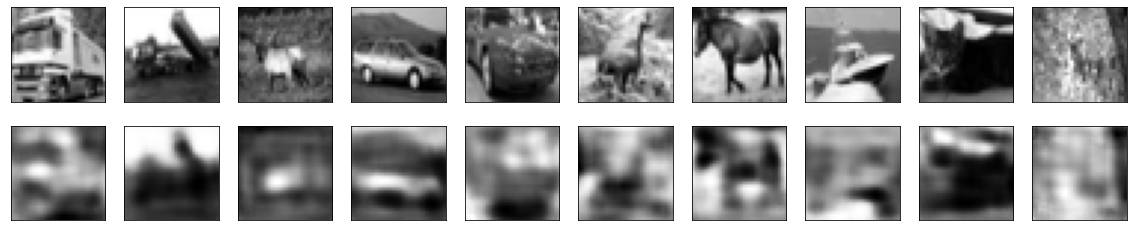

In [ ]:
#PLotting originl vs constructed image

decoded_imgs = autoencoder.predict(x_train_set)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train_set[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Kmeans on encoded variables

In [ ]:
#Preprocessing encoder variables for Kmeans 

encoded = np.array([encoded_output.numpy().reshape(128,1).squeeze(axis = 1) for encoded_output in intermediate_output])  
print(encoded.shape)

(50000, 128)


In [ ]:
#Kmeans on encoder variable 

model = KMeans(n_clusters=13, init='random',
               n_init=10, max_iter=100, random_state=5)

preds = model.fit_predict(encoded)

In [ ]:
print('Davies Bouldin score: {}'.format(davies_bouldin_score(encoded, preds)))
print('ASC score: {}'.format(silhouette_score(encoded, preds)))

Davies Bouldin score: 2.0324454632939095
ASC score: 0.08676658570766449
